# London House Price Data Machine Learning Project Part 2


## Import packages

The first thing that I need to do is import all of the relevant packages that I will need to complete this problem.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import copy
import math
%matplotlib inline


# Define the problem

Firstly I want to import, get brief descriptions about it and try to make sure that there is not any garbage

In [81]:
prices_raw = pd.read_csv('London.csv')
count_flat = (prices_raw['House Type'] == 'Flat / Apartment').sum()
count_house = (prices_raw['House Type'] == 'House').sum()
count_new = (prices_raw["House Type"] == 'New development').sum()

print(f"No of flats: {count_flat}")
print(f"No of houses: {count_house}")
print(f"No of new builds: {count_new}")



No of flats: 1565
No of houses: 1430
No of new builds: 357


This time I am going to split the analysis by property type and build in all 4 features from the dataset.

In [82]:
flat_price_data = prices_raw.loc[prices_raw['House Type'] == 'Flat / Apartment',['Price','Area in sq ft', 'No. of Bedrooms','No. of Bathrooms','No. of Receptions']]
house_price_data = prices_raw.loc[prices_raw['House Type'] == 'New development',['Price','Area in sq ft', 'No. of Bedrooms','No. of Bathrooms','No. of Receptions']]
new_price_data = prices_raw.loc[prices_raw['House Type'] == 'House',['Price','Area in sq ft', 'No. of Bedrooms','No. of Bathrooms','No. of Receptions']]

As before we will make a trainging and test set, remembering to split it by type as above.


In [83]:
train_f, test_f = train_test_split(flat_price_data,test_size= 0.8)
train_h, test_h = train_test_split(house_price_data,test_size= 0.8)
train_n, test_n = train_test_split(new_price_data,test_size= 0.8)

I think I need to convert the data to numpy arrays and again we are doing this three times.

In [84]:
xf_train = train_f[['Area in sq ft','No. of Bedrooms','No. of Bathrooms','No. of Receptions']].to_numpy()
yf_train = train_f['Price'].to_numpy()
xh_train = train_h[['Area in sq ft','No. of Bedrooms','No. of Bathrooms','No. of Receptions']].to_numpy()
yh_train = train_h['Price'].to_numpy()
xn_train = train_n[['Area in sq ft','No. of Bedrooms','No. of Bathrooms','No. of Receptions']].to_numpy()
yn_train = train_n['Price'].to_numpy()

In [85]:
scaler = StandardScaler()
xf_norm = scaler.fit_transform(xf_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(xf_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(xf_norm,axis=0)}")

xh_norm = scaler.fit_transform(xh_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(xh_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(xh_norm,axis=0)}")

xn_norm = scaler.fit_transform(xn_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(xn_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(xn_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[4339    4    4    4]
Peak to Peak range by column in Normalized X:[7.56897294 4.69299124 4.69299124 4.69299124]
Peak to Peak range by column in Raw        X:[5261    4    4    4]
Peak to Peak range by column in Normalized X:[5.45609357 3.64883064 3.64883064 3.64883064]
Peak to Peak range by column in Raw        X:[11895     9     9     9]
Peak to Peak range by column in Normalized X:[7.65459495 7.32205    7.32205    7.32205   ]


In [86]:
model_f = SGDRegressor(max_iter=1000,tol=1e-3, alpha=1e-10)
model_f.fit(xf_norm, yf_train)
print(f"number of iterations completed: {model_f.n_iter_}, number of weight updates: {model_f.t_}")

number of iterations completed: 29, number of weight updates: 9078.0


In [87]:
model_h = SGDRegressor(max_iter=1000, tol=1e-10)
model_h.fit(xh_norm, yh_train)
print(f"number of iterations completed: {model_h.n_iter_}, number of weight updates: {model_h.t_}")

number of iterations completed: 139, number of weight updates: 9870.0


In [88]:
model_n = SGDRegressor(max_iter=1000, tol=1e-10)
model_n.fit(xn_norm, yn_train)
print(f"number of iterations completed: {model_n.n_iter_}, number of weight updates: {model_n.t_}")

number of iterations completed: 26, number of weight updates: 7437.0


In [89]:
bf_norm =model_f.intercept_
wf_norm = model_f.coef_
print(f"model parameters:   w: {wf_norm}, b:{bf_norm}")

model parameters:   w: [1703170.17059398 -115033.39156575 -115033.39156575 -115033.39156575], b:[1338767.38404724]


In [90]:
bh_norm = model_h.intercept_
wh_norm = model_h.coef_
print(f"model parameters:   w: {wh_norm}, b:{bh_norm}")

model parameters:   w: [ 5588351.56184321 -1006250.43535628 -1006250.43535628 -1006250.43535628], b:[2023055.6345759]


In [91]:
bn_norm = model_n.intercept_
wn_norm = model_n.coef_
print(f"model parameters:   w: {wn_norm}, b:{bn_norm}")

model parameters:   w: [1903124.1006869  -130805.16743865 -130805.16743865 -130805.16743865], b:[2408317.29709751]


In [92]:
yf_pred_sgd = model_f.predict(xf_norm)
yf_pred = np.dot(xf_norm, wf_norm) + bf_norm  
print(f"Flat prediction using np.dot() and sgdr.predict match: {(yf_pred == yf_pred_sgd).all()}")

print(f"Flat prediction on training set:\n{yf_pred[:4]}" )
print(f"Flat target values \n{yf_train[:4]}")

Flat prediction using np.dot() and sgdr.predict match: True
Flat prediction on training set:
[ 751887.87484808 1461961.27736974  392394.64595636  405108.23889384]
Flat target values 
[699950 900000 475000 425000]


In [93]:
yh_pred_sgd = model_h.predict(xh_norm)
yh_pred = np.dot(xh_norm, wh_norm) + bh_norm  
print(f"House prediction using np.dot() and sgdr.predict match: {(yh_pred == yh_pred_sgd).all()}")

print(f"House prediction on training set:\n{yh_pred[:4]}" )
print(f"House target values \n{yh_train[:4]}")

House prediction using np.dot() and sgdr.predict match: True
House prediction on training set:
[-1261231.79010211  7293876.1590298    460882.26536806  1584400.10284778]
House target values 
[1050000 4950000  580000 1000000]


In [94]:
yn_pred_sgd = model_n.predict(xn_norm)
yn_pred = np.dot(xn_norm, wn_norm) + bn_norm  
print(f"New Build prediction using np.dot() and sgdr.predict match: {(yn_pred == yn_pred_sgd).all()}")

print(f"New Build prediction on training set:\n{yf_pred[:4]}" )
print(f"Target values \n{yf_train[:4]}")

New Build prediction using np.dot() and sgdr.predict match: True
New Build prediction on training set:
[ 751887.87484808 1461961.27736974  392394.64595636  405108.23889384]
Target values 
[699950 900000 475000 425000]


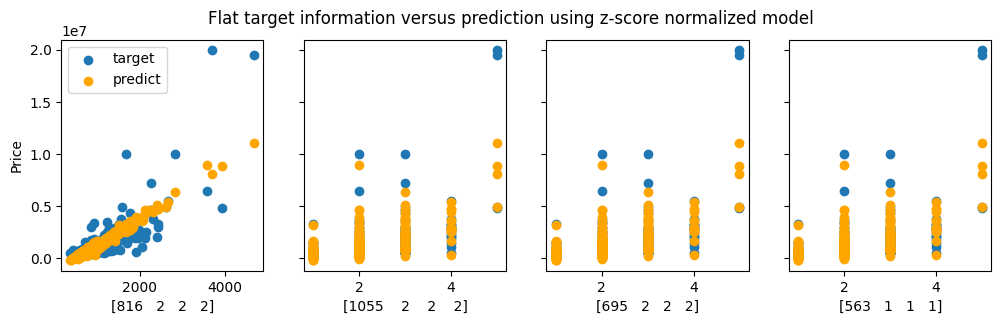

In [95]:
# plot predications vs targets for flat data
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(xf_train[:,i],yf_train, label = 'target')
    ax[i].set_xlabel(xf_train[i])
    ax[i].scatter(xf_train[:,i],yf_pred,color=["orange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Flat target information versus prediction using z-score normalized model")
plt.show()

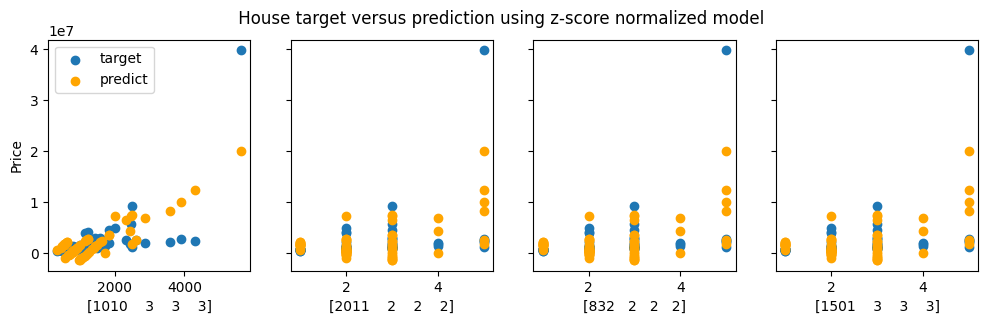

In [96]:
# plot predications vs targets for houses data
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(xh_train[:,i],yh_train, label = 'target')
    ax[i].set_xlabel(xh_train[i])
    ax[i].scatter(xh_train[:,i],yh_pred,color=["orange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle(" House target versus prediction using z-score normalized model")
plt.show()

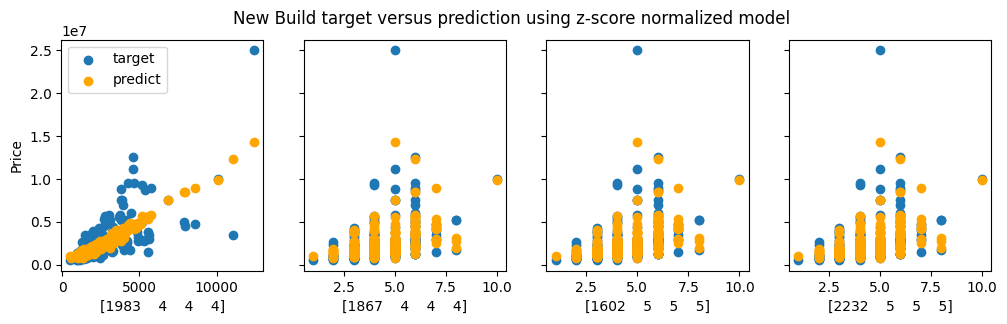

In [97]:
# plot predications vs targets for new build  data
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(xn_train[:,i],yn_train, label = 'target')
    ax[i].set_xlabel(xn_train[i])
    ax[i].scatter(xn_train[:,i],yn_pred,color=["orange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("New Build target versus prediction using z-score normalized model")
plt.show()

I need to find out if this model represents reality so will consider the mean_squared error of the model again the training data.  At the moment changes we need to check if it is worth moving to testing it yet.

In [98]:
msef = mean_squared_error(yf_train, yf_pred)
r2f = r2_score(yf_train, yf_pred)

print(f"Mean squared error: {msef:,.0f}")
print(f"R2 score: {r2f:.2f}")

Mean squared error: 1,425,287,515,290
R2 score: 0.61


These scores indicate that I am not modelling the flat data very well....on to the next

In [99]:
mseh = mean_squared_error(yh_train, yh_pred)
r2h = r2_score(yh_train, yh_pred)

print(f"Mean squared error: {mseh:,.0f}")
print(f"R2 score: {r2h:.2f}")

Mean squared error: 9,924,500,452,150
R2 score: 0.56


We have managed the impossible and done even worse in this category.

In [100]:
msen = mean_squared_error(yn_train, yn_pred)
r2n = r2_score(yn_train, yn_pred)

print(f"Mean squared error: {msen:,.0f}")
print(f"R2 score: {r2n:.2f}")

Mean squared error: 2,537,004,659,057
R2 score: 0.53


This model is not very good and I think that a better fit would be an exponential model which SGDRegressor is not.  This was shown in the prediction cells and the mean square, r2 information.  I will try an exponential model and also adjust the learning rate to do better.  I will concentrate just on Flats data now.

In [104]:
xf_test = test_f[['Area in sq ft','No. of Bedrooms','No. of Bathrooms','No. of Receptions']].to_numpy()
yf_test = test_f['Price'].to_numpy()
xh_test = test_h[['Area in sq ft','No. of Bedrooms','No. of Bathrooms','No. of Receptions']].to_numpy()
yh_test = test_h['Price'].to_numpy()
xn_test = test_n[['Area in sq ft','No. of Bedrooms','No. of Bathrooms','No. of Receptions']].to_numpy()
yn_test = test_n['Price'].to_numpy()

regressor_f = RandomForestRegressor(
    n_estimators=100, 
    max_depth=None, 
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt', 
    bootstrap=True,
    random_state=0,
    oob_score=True
)
regressor_f.fit(xf_train, yf_train)
print(f"Number of trees: {regressor_f.n_estimators}")
print(f"OOB Score: {regressor_f.oob_score_}")

print(f"Feature importances: {regressor_f.feature_importances_}")
print(f"Number of features: {regressor_f.n_features_in_}")

yf_pred = regressor_f.predict(xf_test)

mse2_f = mean_squared_error(yf_test, yf_pred)
rmse_f = np.sqrt(mse2_f)

print(f"Mean Squared Error: {mse2_f}")
print(f"Root Mean Squared Error: {rmse_f}")

print(f"Random Forest predictions on test set:\n{yf_pred[:4]}" )
print(f"Actual target values:\n{yf_test[:4]}")

r2 = regressor_f.score(xf_test, yf_test)
print(f"R-squared score: {r2}")

scores = cross_val_score(regressor_f, xf_train, yf_train, cv=5, scoring='r2')
print(f"Cross-validation scores: {scores}")
print(f"Mean R2: {np.mean(scores)}")

Number of trees: 100
OOB Score: 0.38549647979249346
Feature importances: [0.70602199 0.0938165  0.11506397 0.08509754]
Number of features: 4
Mean Squared Error: 1021078664087.4365
Root Mean Squared Error: 1010484.3710258148
Random Forest predictions on test set:
[ 658645.83333333 1241000.          810560.          981000.        ]
Actual target values:
[ 575000 1850000  900000  965000]
R-squared score: 0.48623063793458665
Cross-validation scores: [0.31205387 0.60526902 0.63753916 0.59261063 0.22181188]
Mean R2: 0.47385691210028114
